In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
from datetime import datetime
import seaborn as sns
import pycountry_convert as pc

## I. Part 2 of our analysis

In [2]:
avioset = pd.read_csv('data/dataset_1_accident_bureau/aviodata.csv')

In [3]:
avioset.shape

(28511, 19)

In [4]:
avioset.head()

,date,aircraft,operator,flight_phase,flight_type,survivors,crash_site,crash_location,country,region,crew_on_board,crew_fatalities,pax_on_board,pax_fatalities,other_fatalities,total_fatalities,crash_cause,year,month
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2,2,0,0,0,2,Technical failure,1918,5
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6,5,0,0,0,5,Technical failure,1918,6
2,1918-06-11,Avro 504,Royal Air Force - RAF,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2,1,0,0,0,1,Unknown,1918,6
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1,1,0,0,0,1,Technical failure,1918,6
4,1918-07-14,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1,1,0,0,0,1,Unknown,1918,7


In [5]:
test_corr = avioset.copy()

In [6]:
# View NAN values in all columns
def all_columns_nan_values(df):
    for col in df.columns:
        print(f"All nan values in column \'{col}\': \n {df[col].isna().sum()}\n\n **************** \n")

all_columns_nan_values(test_corr)

All nan values in column 'date': 
 0

 **************** 

All nan values in column 'aircraft': 
 1

 **************** 

All nan values in column 'operator': 
 0

 **************** 

All nan values in column 'flight_phase': 
 630

 **************** 

All nan values in column 'flight_type': 
 57

 **************** 

All nan values in column 'survivors': 
 0

 **************** 

All nan values in column 'crash_site': 
 379

 **************** 

All nan values in column 'crash_location': 
 12

 **************** 

All nan values in column 'country': 
 1

 **************** 

All nan values in column 'region': 
 1

 **************** 

All nan values in column 'crew_on_board': 
 0

 **************** 

All nan values in column 'crew_fatalities': 
 0

 **************** 

All nan values in column 'pax_on_board': 
 0

 **************** 

All nan values in column 'pax_fatalities': 
 0

 **************** 

All nan values in column 'other_fatalities': 
 0

 **************** 

All nan values in column 

In [7]:
test_corr.shape

(28511, 19)

In [8]:
test_corr = test_corr.dropna()
test_corr.shape

(27716, 19)

In [9]:
test_drop_date = test_corr.drop('date', axis=1)

In [10]:
test_drop_date.columns

Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'crash_cause', 'year', 'month'],
      dtype='object')

In [11]:
test_drop_date.shape

(27716, 18)

In [12]:
numeric_df = test_drop_date.select_dtypes(include=[float, int])

In [13]:
numeric_df.columns

Index(['crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities',
       'other_fatalities', 'total_fatalities', 'year', 'month'],
      dtype='object')

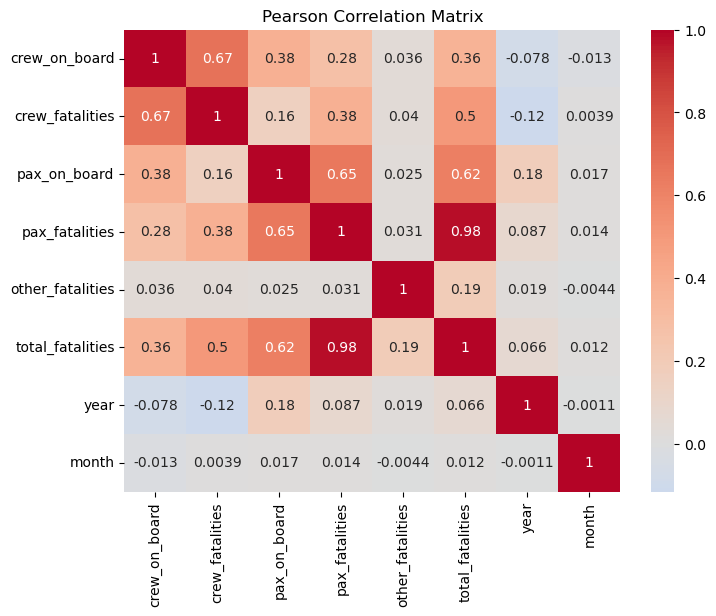

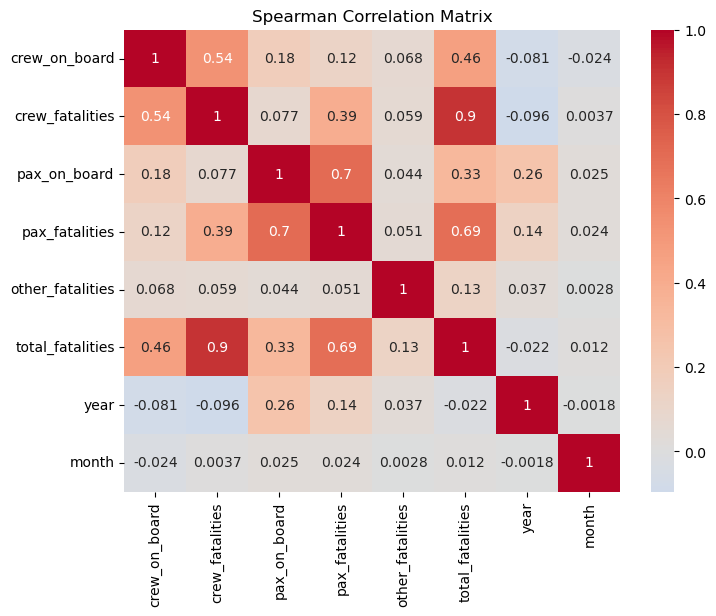

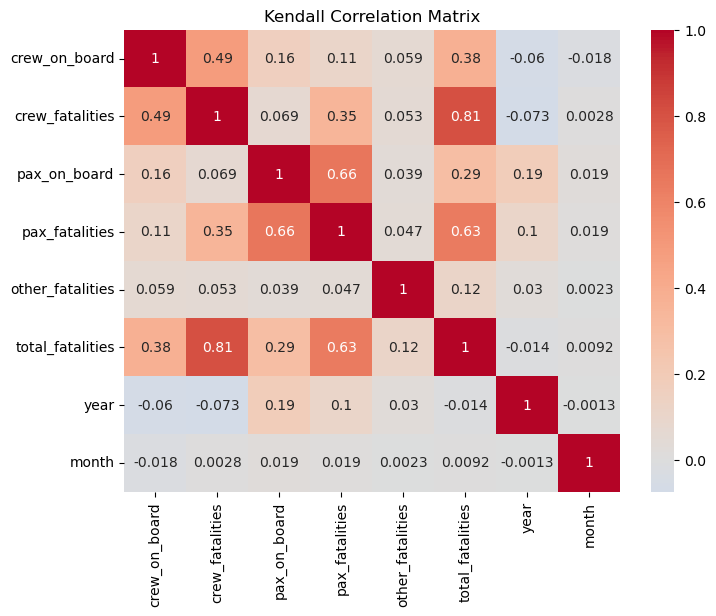

In [15]:
correlation_methods = ['pearson', 'spearman', 'kendall']

for method in correlation_methods:
    corr_matrix = numeric_df.corr(method=method)
    
    # Plotting the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

<div style="background-color: #9df9ef; padding: 10px;"></div>